# Estudo sobre Modelo de Classificação

## Importações

In [1]:
import pandas as pd
import numpy as np

In [3]:
#import plotly.express as px
import seaborn as sns
from matplotlib.legend_handler import HandlerLine2D
import matplotlib.pyplot as plt

In [4]:
#from feature_engine.imputation import CategoricalImputer

In [6]:
#from imblearn.over_sampling import RandomOverSampler

In [7]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn import metrics

In [8]:
from sklearn.metrics import accuracy_score, precision_recall_curve,precision_score, plot_roc_curve

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [10]:
df_treino = pd.read_csv("marketing_training.csv")

In [11]:
df_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7414 entries, 0 to 7413
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   custAge         5610 non-null   float64
 1   profession      7414 non-null   object 
 2   marital         7414 non-null   object 
 3   schooling       5259 non-null   object 
 4   default         7414 non-null   object 
 5   housing         7414 non-null   object 
 6   loan            7414 non-null   object 
 7   contact         7414 non-null   object 
 8   month           7414 non-null   object 
 9   day_of_week     6703 non-null   object 
 10  campaign        7414 non-null   int64  
 11  pdays           7414 non-null   int64  
 12  previous        7414 non-null   int64  
 13  poutcome        7414 non-null   object 
 14  emp.var.rate    7414 non-null   float64
 15  cons.price.idx  7414 non-null   float64
 16  cons.conf.idx   7414 non-null   float64
 17  euribor3m       7414 non-null   f

## Exploração Dataset

In [12]:
df_treino.describe()

,custAge,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail
count,5610.000000,7414.000000,7414.000000,7414.000000,7414.000000,7414.000000,7414.000000,7414.000000,7414.000000,7414.000000,7414.000000
mean,40.009804,2.518344,960.024548,0.184111,0.052091,93.570708,-40.561316,3.583141,5165.224251,959.797028,0.361883
std,10.574616,2.695055,192.845029,0.516775,1.568399,0.578345,4.649800,1.744865,73.108669,193.969418,1.261668
min,18.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000,0.000000
25%,32.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000,999.000000,0.000000
50%,38.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.857000,5191.000000,999.000000,0.000000
75%,47.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,999.000000,0.000000
max,94.000000,40.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,999.000000,18.000000


In [13]:
df_treino.responded.value_counts()

no     6574
yes     840
Name: responded, dtype: int64

O dataset não está desbalanceado em relação a variável a ser classificada, um ponto de atenção para utilização de algum método de sample (over|under) no momento da modelagem

In [14]:
df_treino.head()

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
0,55.0,admin.,single,university.degree,unknown,no,no,cellular,nov,mon,...,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,999.0,0,no
1,NaN,blue-collar,married,NaN,no,no,no,cellular,jul,mon,...,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,999.0,0,no
2,42.0,technician,married,high.school,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,999.0,0,no
3,55.0,management,divorced,NaN,unknown,yes,yes,cellular,jul,wed,...,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,999.0,0,no
4,NaN,admin.,divorced,university.degree,no,yes,no,cellular,may,tue,...,1,failure,-1.8,92.893,-46.2,1.291,5099.1,999.0,1,no


<H4> Verificando as distribuições e correlações das variáveis presentes do dataset

In [15]:
df_treino.describe()

,custAge,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail
count,5610.000000,7414.000000,7414.000000,7414.000000,7414.000000,7414.000000,7414.000000,7414.000000,7414.000000,7414.000000,7414.000000
mean,40.009804,2.518344,960.024548,0.184111,0.052091,93.570708,-40.561316,3.583141,5165.224251,959.797028,0.361883
std,10.574616,2.695055,192.845029,0.516775,1.568399,0.578345,4.649800,1.744865,73.108669,193.969418,1.261668
min,18.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000,0.000000
25%,32.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000,999.000000,0.000000
50%,38.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.857000,5191.000000,999.000000,0.000000
75%,47.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,999.000000,0.000000
max,94.000000,40.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,999.000000,18.000000


In [16]:
df_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7414 entries, 0 to 7413
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   custAge         5610 non-null   float64
 1   profession      7414 non-null   object 
 2   marital         7414 non-null   object 
 3   schooling       5259 non-null   object 
 4   default         7414 non-null   object 
 5   housing         7414 non-null   object 
 6   loan            7414 non-null   object 
 7   contact         7414 non-null   object 
 8   month           7414 non-null   object 
 9   day_of_week     6703 non-null   object 
 10  campaign        7414 non-null   int64  
 11  pdays           7414 non-null   int64  
 12  previous        7414 non-null   int64  
 13  poutcome        7414 non-null   object 
 14  emp.var.rate    7414 non-null   float64
 15  cons.price.idx  7414 non-null   float64
 16  cons.conf.idx   7414 non-null   float64
 17  euribor3m       7414 non-null   f

In [17]:
df_treino.select_dtypes(include=['int64']).columns.values

array(['campaign', 'pdays', 'previous', 'pastEmail'], dtype=object)

In [18]:
#discret_columns = df_treino.select_dtypes(include=['int64']).columns.values.tolist()
string_columns = df_treino.select_dtypes(include=['object']).columns.values.tolist()
numerical_columns = df_treino.select_dtypes(include=['int64','float64']).columns.values.tolist()

In [19]:
string_columns.remove('responded')

In [ ]:
#sns.pairplot(df_treino)

In [22]:
# plt.figure(figsize=(16, 6))
# heatmap = sns.heatmap(df_treino[numerical_columns].corr(), vmin=-1, vmax=1, annot=True)
# heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [23]:
# for v in string_columns:
#     fig = px.box(df_treino, x=v, y="custAge")
#     fig.show()

A coluna <i> nr.employed </i> tem uma forte correlação entre outras variáveis, poderíamos retirar ela do modelo afin de reduzir a complexidade.

## Pré processamento

In [24]:
X = df_treino.drop(['responded'], axis=1)
y = df_treino['responded'].apply(lambda x: 1 if x == 'yes' else 0)

In [25]:
y.value_counts()

0    6574
1     840
Name: responded, dtype: int64

In [23]:
# ros = RandomOverSampler(random_state=42)
# X_resampled, y_resampled = ros.fit_resample(X, y)

In [26]:
#y_resampled.value_counts()

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

<h3> Split train test </h3>
Escolhi fazer o split de treino e de teste nesse momento pensando sobre caso eu vá utilizar um pré processoamento dos dados eu não quero que ocorra vazamento das informações do test em treino. 
Não sei se é o melhor approach, mas segui dessa maneira.

In [28]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5189 entries, 2835 to 7270
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   custAge         3929 non-null   float64
 1   profession      5189 non-null   object 
 2   marital         5189 non-null   object 
 3   schooling       3665 non-null   object 
 4   default         5189 non-null   object 
 5   housing         5189 non-null   object 
 6   loan            5189 non-null   object 
 7   contact         5189 non-null   object 
 8   month           5189 non-null   object 
 9   day_of_week     4726 non-null   object 
 10  campaign        5189 non-null   int64  
 11  pdays           5189 non-null   int64  
 12  previous        5189 non-null   int64  
 13  poutcome        5189 non-null   object 
 14  emp.var.rate    5189 non-null   float64
 15  cons.price.idx  5189 non-null   float64
 16  cons.conf.idx   5189 non-null   float64
 17  euribor3m       5189 non-null 

In [29]:
X_train.day_of_week.value_counts()

mon    1008
thu     996
tue     949
wed     902
fri     871
Name: day_of_week, dtype: int64

In [30]:
X_train.schooling.value_counts()

university.degree      1095
high.school             839
basic.9y                535
professional.course     474
basic.4y                366
basic.6y                187
unknown                 168
illiterate                1
Name: schooling, dtype: int64

<p> Como vou tratar os missing values: Para o valor de <i>custAge</i>, dada a correlação e distribuição vou utilizar a média de valores com o agrupamento relativo a profession e marital. <p>
<p> No caso das variáveis categóricas vou utilizar duas formas, a primeira para o <i>schooling</i> que utilizarei a frequencia mais comum. <p>
<p> No caso do <i>day_of_week</i>, pela distribuição homogênea entre os dias vou utilizar a variável categórica nula como uma nova variável.<p> 

In [31]:
# Tratamento da variável de Idade
X_train.custAge.fillna(X_train.groupby(['marital','profession'])['custAge'].transform('mean'), inplace=True)

X_test.custAge.fillna(X_test.groupby(['marital','profession'])['custAge'].transform('mean'), inplace=True)

/Users/pedroalves/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [32]:
# Tratamento da variável day_of_week
X_train.day_of_week.fillna("desconhecido", inplace=True)
X_test.day_of_week.fillna("desconhecido", inplace=True)

In [33]:
# Tratamento da variável day_of_week
X_train.schooling.fillna("university.degree", inplace=True)
X_test.schooling.fillna("university.degree", inplace=True)

In [34]:
X_train.isnull().sum()

custAge           1
profession        0
marital           0
schooling         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
pmonths           0
pastEmail         0
dtype: int64

In [35]:
X_test.isnull().sum()

custAge           1
profession        0
marital           0
schooling         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
pmonths           0
pastEmail         0
dtype: int64

In [36]:
#print(f' Colunas discretas :{discret_columns}')
print(f' Colunas categóricas :{string_columns}')
print(f' Colunas numéricas :{numerical_columns}')

 Colunas categóricas :['profession', 'marital', 'schooling', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
 Colunas numéricas :['custAge', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'pmonths', 'pastEmail']


## Teste de modelo (Pipeline)

In [37]:
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_columns),
        ("cat", categorical_transformer, string_columns),
    ]
)

In [49]:
pipeline_logistic = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression())]
)

In [39]:
# clf.fit(X_train, y_train)
# print(f'model score: {(clf.score(X_test, y_test)):.3f}')

## Funções

In [40]:
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm):
    
    classes = ['Positive','Negative']

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Matriz de confusão normalizada')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f') + '%',
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Classe real')
    plt.xlabel('Classe predita')
    plt.tight_layout()
    plt.show()

def print_confusion_for(test_x, test_y, model):
    pred_y = model.predict(test_x)
    print("Acurácia do modelo em teste", model.score(test_x, test_y))
    cnf_matrix = confusion_matrix(test_y, pred_y)

    plot_confusion_matrix(cnf_matrix)

In [41]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

In [42]:
def plot_roc (X_treino,X_test,y_treino,y_test,model):
    y_pred_proba1 = model.predict_proba(X_treino)[::,1]
    fpr1, tpr1, _ = metrics.roc_curve(y_treino,  y_pred_proba1)
    auc1 = metrics.roc_auc_score(y_treino, y_pred_proba1)
    y_pred_proba2 = model.predict_proba(X_test)[::,1]
    fpr2, tpr2, _ = metrics.roc_curve(y_test,  y_pred_proba2)
    auc2 = metrics.roc_auc_score(y_test, y_pred_proba2)
    
    line1, = plt.plot(fpr1, tpr1, 'b', label="AUC="+str(auc1))
    line2, = plt.plot(fpr2, tpr2, 'r', label="AUC="+str(auc2))
    plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

## Modelos

In [45]:
# X_train_transformed = preprocessor.fit_transform(X_train)
# X_test_transformed = preprocessor.transform(X_test)
#X_resampled_transformed = preprocessor.transform(X_resampled)

In [50]:
pipeline_logistic

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['custAge', 'campaign',
                                                   'pdays', 'previous',
                                                   'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed', 'pmonths',
                                                   'pastEmail']),
                                                 ('cat',
  

In [57]:
# coloque o nome do step da pipeline antes do parametro de interesse, seguido de dois _ 
# vc poderia cross validar parametros dos scalers tambem, por exemplo
parameters = {'classifier__max_iter': [100]
              ,'classifier__solver' : ['liblinear']
              ,'classifier__C' : np.logspace(-3, 3, 10)
              ,'classifier__penalty' : ['l1', 'l2']
              , 'classifier__fit_intercept': [True]
              , 'classifier__class_weight':['balanced',None]
             } 

SEED = 1988
np.random.seed(SEED)
cv = KFold(3, shuffle=True)


grid_search_cv = GridSearchCV(pipeline_logistic, parameters, cv=cv, verbose=5, n_jobs=8)
grid_search_cv.fit(X_train, y_train)


[CV 1/3] END classifier__C=0.001, classifier__fit_intercept=True, classifier__max_iter=100, classifier__penalty=l2, classifier__solver=liblinear;, score=0.910 total time=   0.1s
[CV 2/3] END classifier__C=0.004641588833612777, classifier__fit_intercept=True, classifier__max_iter=100, classifier__penalty=l2, classifier__solver=liblinear;, score=0.905 total time=   0.1s
[CV 3/3] END classifier__C=0.021544346900318832, classifier__fit_intercept=True, classifier__max_iter=100, classifier__penalty=l2, classifier__solver=liblinear;, score=0.898 total time=   0.1s
[CV 2/3] END classifier__C=0.46415888336127775, classifier__fit_intercept=True, classifier__max_iter=100, classifier__penalty=l1, classifier__solver=liblinear;, score=0.905 total time=   0.2s
[CV 1/3] END classifier__C=10.0, classifier__fit_intercept=True, classifier__max_iter=100, classifier__penalty=l2, classifier__solver=liblinear;, score=0.913 total time=   0.1s
[CV 3/3] END classifier__C=10.0, classifier__fit_intercept=True, cl

/Users/pedroalves/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV 3/3] END classifier__C=0.001, classifier__fit_intercept=True, classifier__max_iter=100, classifier__penalty=l1, classifier__solver=liblinear;, score=0.890 total time=   0.1s
[CV 3/3] END classifier__C=0.004641588833612777, classifier__fit_intercept=True, classifier__max_iter=100, classifier__penalty=l2, classifier__solver=liblinear;, score=0.898 total time=   0.1s
[CV 2/3] END classifier__C=0.1, classifier__fit_intercept=True, classifier__max_iter=100, classifier__penalty=l1, classifier__solver=liblinear;, score=0.905 total time=   0.1s
[CV 3/3] END classifier__C=0.46415888336127775, classifier__fit_intercept=True, classifier__max_iter=100, classifier__penalty=l1, classifier__solver=liblinear;, score=0.900 total time=   0.1s
[CV 3/3] END classifier__C=2.154434690031882, classifier__fit_intercept=True, classifier__max_iter=100, classifier__penalty=l2, classifier__solver=liblinear;, score=0.897 total time=   0.1s
[CV 2/3] END classifier__C=10.0, classifier__fit_intercept=True, classi

/Users/pedroalves/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/pedroalves/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


GridSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['custAge',
                                                                          'campaign',
                                                                          'pdays',
                                                                          'previous',
                   

LinearRegression
------------------------------
Parametros ótimos = {'classifier__C': 0.46415888336127775, 'classifier__class_weight': None, 'classifier__fit_intercept': True, 'classifier__max_iter': 100, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Score: 0.8876404494382022
------------------------------
Acurácia do modelo em teste 0.8876404494382022


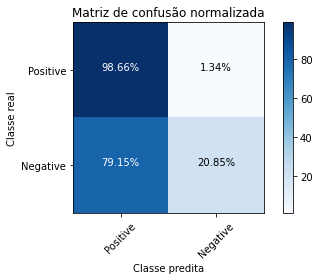

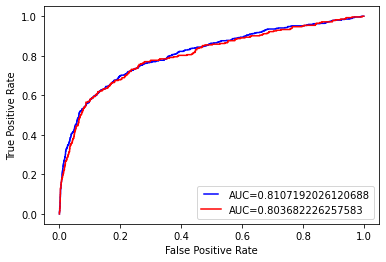

Métricas do modelo
Accuracy: 0.8876404494382022
Precision: 0.6941176470588235
Recall: 0.20848056537102475
F1 Score: 0.32065217391304346
Cohens Kappa Score: 0.27824417080797725
Area Under Curve: 0.803682226257583


In [58]:
grid_search_cv.best_params_
grid_search_cv.predict(X_test)
score = grid_search_cv.score(X_test, y_test)
#results = cross_validate(model, X_train, y_train, cv=cv, return_train_score = False)
y_pred = grid_search_cv.predict(X_test)
best_grid = grid_search_cv.best_estimator_
best_grid_eval = evaluate_model(best_grid, X_test, y_test)

# Print result

print("LinearRegression")
print("------------------------------")
print(f'Parametros ótimos = {grid_search_cv.best_params_}')
print(f'Score: {score}')
print("------------------------------")
print_confusion_for(X_test, y_test, best_grid)
plot_roc(X_train,X_test,y_train,y_test,best_grid)

print("Métricas do modelo")
print(f'Accuracy: {best_grid_eval["acc"]}')
print(f'Precision: {best_grid_eval["prec"]}')
print(f'Recall: {best_grid_eval["rec"]}')
print(f'F1 Score: {best_grid_eval["f1"]}')
print(f'Cohens Kappa Score: {best_grid_eval["kappa"]}')
print(f'Area Under Curve: {best_grid_eval["auc"]}')

Fitting 10 folds for each of 96 candidates, totalling 960 fits
RandomForestClassifier
------------------------------
Parametros ótimos = {'bootstrap': False, 'max_depth': 50, 'max_features': 4, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 1000}
Score: 0.9196451204055767
------------------------------
Acurácia do modelo em teste 0.9196451204055767


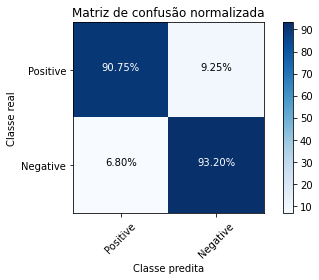

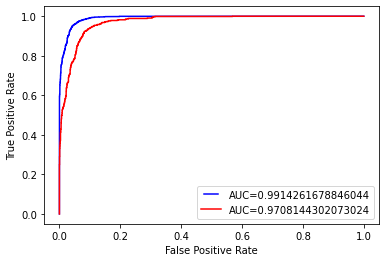

Métricas do modelo
Accuracy: 0.9196451204055767
Precision: 0.9082751744765702
Recall: 0.9319693094629156
F1 Score: 0.9199697046200455
Cohens Kappa Score: 0.839314452531485
Area Under Curve: 0.9708144302073024


In [56]:
parameters = {'bootstrap': [True, False],
     'max_depth': [50, 100],
    'max_features': [2, 4],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [10, 12],
    'n_estimators': [300, 500,1000]} 
model = RandomForestClassifier()

SEED = 1988
np.random.seed(SEED)
cv = KFold(10, shuffle=True)


clf = GridSearchCV(model, parameters, cv=cv, verbose=5, n_jobs=8)
clf.fit(X_train_transformed, y_train)
clf.best_params_
clf.predict(X_test_transformed)
score = clf.score(X_test_transformed, y_test)
results = cross_validate(model, X_resampled_transformed, y_resampled, cv=cv, return_train_score = False)
y_pred = clf.predict(X_test_transformed)
#media = results['test_score'].mean()
#desvio = results['test_score'].std()
best_grid = clf.best_estimator_
best_grid_eval = evaluate_model(best_grid, X_test_transformed, y_test)

# Print result

print("RandomForestClassifier")
print("------------------------------")
print(f'Parametros ótimos = {clf.best_params_}')
print(f'Score: {score}')
print("------------------------------")
print_confusion_for(X_test_transformed, y_test, clf)
plot_roc(X_train_transformed,X_test_transformed,y_train,y_test,clf)

print("Métricas do modelo")
print(f'Accuracy: {best_grid_eval["acc"]}')
print(f'Precision: {best_grid_eval["prec"]}')
print(f'Recall: {best_grid_eval["rec"]}')
print(f'F1 Score: {best_grid_eval["f1"]}')
print(f'Cohens Kappa Score: {best_grid_eval["kappa"]}')
print(f'Area Under Curve: {best_grid_eval["auc"]}')

In [57]:
parameters = {"learning_rate" :[1, 0.5, 0.1, 0.05, 0.01],
     'max_depth': [50, 100],
    'max_features': [2, 4],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [10, 12],
    'n_estimators': [300, 500,1000]} 
model = GradientBoostingClassifier()

SEED = 1988
np.random.seed(SEED)
cv = KFold(10, shuffle=True)


clf = GridSearchCV(model, parameters, cv=cv, verbose=5, n_jobs=8)
clf.fit(X_train_transformed, y_train)
clf.best_params_
clf.predict(X_test_transformed)
score = clf.score(X_test_transformed, y_test)
results = cross_validate(model, X_resampled_transformed, y_resampled, cv=cv, return_train_score = False)
y_pred = clf.predict(X_test_transformed)
#media = results['test_score'].mean()
#desvio = results['test_score'].std()
best_grid = clf.best_estimator_
best_grid_eval = evaluate_model(best_grid, X_test_transformed, y_test)

# Print result

print("GradientBoostingClassifier")
print("------------------------------")
print(f'Parametros ótimos = {clf.best_params_}')
print(f'Score: {score}')
print("------------------------------")
print_confusion_for(X_test_transformed, y_test, clf)
plot_roc(X_train_transformed,X_test_transformed,y_train,y_test,clf)

print("Métricas do modelo")
print(f'Accuracy: {best_grid_eval["acc"]}')
print(f'Precision: {best_grid_eval["prec"]}')
print(f'Recall: {best_grid_eval["rec"]}')
print(f'F1 Score: {best_grid_eval["f1"]}')
print(f'Cohens Kappa Score: {best_grid_eval["kappa"]}')
print(f'Area Under Curve: {best_grid_eval["auc"]}')

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


KeyboardInterrupt: 